<font color='blue'>

* [Loading the Data Set](#1)
* [Normalization, Reshape and Label Encoding ](#2)
* [Train Test Split](#3)
* [Convolutional Neural Network](#4)
    * [What is Convolution Operation?](#5)
    * [Same Padding](#6)
    * [Max Pooling](#7)
    * [Flattening](#8)
    * [Full Connection](#9)
* [Implementing with Keras](#10)
    * [Create Model](#11)
    * [Define Optimizer](#12)
    * [Compile Model](#13)
    * [Epochs and Batch Size](#14)
    * [Data Augmentation](#15)
    * [Fit the Model](#16)
    * [Evaluate the Model](#17)
* [Deep Learning Tutorial for Beginners](https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners)
* [Artificial Neural Network with Pytorch](https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers)
* [Convolutional Neural Network with Pytorch](https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers)
* [Recurrent Neural Network with Pytorch](https://www.kaggle.com/kanncaa1/recurrent-neural-network-with-pytorch)

In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import seaborn as sns

## 1-Read Dataset

In [2]:
train = pd.read_csv("data/train.csv")
print(train.shape) # 42000 tane train edilecek farklı resim var ve her bir resim 28x28 (784) boyutunda ve resimdeki sayıyı ifade eden label sütunu bulunmakta.
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Note
* test datası içerisinde y target class yok. Yalnızca X_test diyebileceğimiz test datası var! :)

In [3]:
test = pd.read_csv("data/test.csv")
print(test.shape) # 28000 tane test edilecek farklı resim var ve her bir resim 28x28 (784) boyutunda
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y_train = train["label"] # target class
X_train = train.drop(labels = ["label"], axis = 1) # label hariç tüm piksel sütunları bizim verimiz olacak.

In [5]:
Y_train.shape

(42000,)

In [6]:
target_class_count = len(pd.unique(train["label"]))
target_class_count

10

## 2-Visualize Data

### A) Visualize Target Class (Y_train)

In [7]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

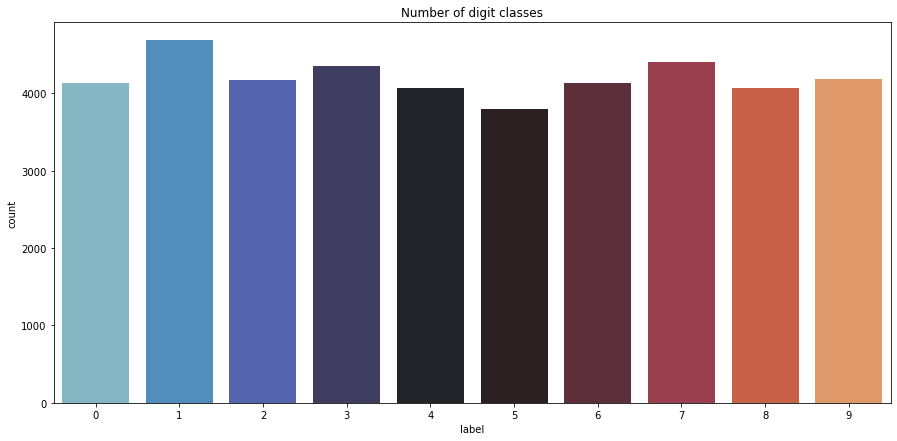

In [8]:
plt.figure(figsize=(15, 7))
sns.countplot(Y_train, palette="icefire")
plt.title("Number of digit classes")
plt.show()

### B) Visualize Train Data
     i) Visualize First Index (Number 1)

In [9]:
Y_train.iloc[0]

1

In [10]:
X_train.iloc[0]

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 784, dtype: int64

In [11]:
img = X_train.iloc[0].to_numpy() # ilk indexi (resmi) alıp dönüştürürüz: pandas.series => vektörel numpy.array 
img

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [12]:
img.shape # 784x1

(784,)

In [13]:
img = img.reshape((28, 28)) #  784x1 => 28x28'e dönüştürülür.

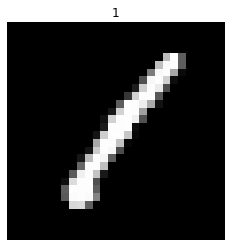

In [14]:
plt.imshow(img, cmap='gray') # gray=siyah beyaz yap
plt.title(train.iloc[0, 0]) # ilk indexin labelı
plt.axis("off") # resim olduğu için eksenleri göstermye gerek yok
plt.show()

     ii) Visualize First Index (Number 4)

In [15]:
img = X_train.iloc[3].to_numpy()

In [16]:
img = img.reshape((28,28))

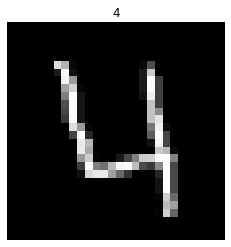

In [17]:
plt.imshow(img, cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

## 3) Preprocessing 
### Normalization, Reshape and Label Encoding 
* Normalization
    * We perform a grayscale normalization to reduce the effect of illumination's differences.
    * If we perform normalization, CNN works faster.
* Reshape
    * Train and test images (28 x 28) 
    * We reshape all data to 28x28x1 3D matrices.
    * Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel. 
* Label Encoding  
    * Encode labels to one hot vectors 
        * 2 => [0,0,1,0,0,0,0,0,0,0]
        * 4 => [0,0,0,0,1,0,0,0,0,0]

### A) Normalization

In [18]:
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


### B) Reshape

In [19]:
X_train = X_train.to_numpy().reshape(-1, 28,28,1) # -1 => data sayısı (42000) Son parametre 1: gray, 3 olsaydı rgb 
test = test.to_numpy().reshape(-1, 28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


### C) Label Encoding 

In [20]:
Y_train = to_categorical(Y_train, num_classes = target_class_count) # 10 different class

### D) Split Data
* test size is 10%.
* train size is 90%.
* **X_train** datasından hem X_train hem X_val elde ettik. **X_val** haricinde **test** adında **X_test** görevini üstelenen büyük test datasının olduğunu unutmayalım.
* **X_train** datasını 
* **Y_val** değişkenin amacı X_val'daki değerlerin karşılığını tutup tahminlemelerde kıyaslamaktır.
* Aşamalar:
  * **X_train** datasıyla modeli eğitiriz.
  *  **X_val** ile doğrulama (ilk test) yapılacak.
  *  **test** datasıyla gerçek test yapılacak.

In [21]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 42)
print("x_train shape", X_train.shape)
print("x_validation shape", X_val.shape)
print("y_train shape", Y_train.shape)
print("y_validation shape", Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_validation shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_validation shape (4200, 10)


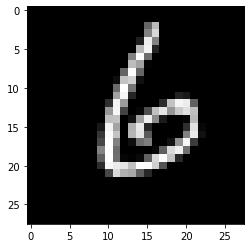

In [22]:
# Some examples
plt.imshow(X_train[2][:,:,0], cmap='gray')
plt.show()

## 4-What is Convolutional Neural Network (Theoritical)
Aşağıdaki resimde 5 **input**u yerine bir kedi resmi olduğunu varsayalım. Genel olarak yapı mantığı ve sırası:
1. Convolution Layer(**Activation function=relu** uygulanır):
    * kedinin kulağını gözünü ağzını ayırt eden, herbiri farklı bir özelliğe hizmet eden **filter**ler burada bulunur. Bu filtreleme işlemi sonucunda göz, kulak şeklinde ayrı ayrı **feature map**'ler oluşturulur. Kulak için ve göz için ayrı filter'lar kullanıldığı için, ayrı ayrı filter map'ler oluşturulur.
2. Pooling Layer
    * Elimizde olan kedi kulağı, gözünün tamamına ihtiyacımız yok. Kulağı ayırt edebilecek en büyük ya da orta değeri/sayıyı down sampling yapılır. Yani matrix'in size'ını küçültür. Bu bize hız sağlar. **Orientation** özelliği olur ve **overfitting**(ezberleme)'i engeller.
3. Convolution Layer(**Activation function=relu**):
   * Yukarıdaki CL'nin aynısı. Ne kadar çok CL varsa o kadar iyi diyebiliriz.(her zaman geçerli değil. Denemek lazım.)
4. Pooling Layer
   * Yukarıdaki PL'nin aynısı.
5. Flatten(Düzleştirme)
   * ANN'deki flatten ile aynı. 3x3 matrisimiz varsa => 9x1 vektörel bir hale getirme işlemi 
6. Fully Connected(ANN) **Activation function=softmax**
7. Output



* CNN is used for image classification, object detection 
* <a href="https://ibb.co/kV1j9p"><img src="https://preview.ibb.co/nRkBpp/gec2.jpg" alt="gec2" border="0"></a>

### What is Convolution Operation?
* We have some image and feature detector(3*3)
* Feature detector does not need to be 3 by 3 matrix. It can be 5 by 5 or 7 by 7.
* **Feature detector** = kernel = **filter**
* **Feauture detector** detects features like **edges** or **convex shapes**. Example, if out input is dog, feature detector can detect features like ear or tail of the dog.
* feature map = conv(input image, feature detector). Element wise multiplication of matrices.
* feature map = convolved feature
* Stride = navigating in input image. (detectorun işlemi bitince bir atlayıp sağa(yana) kayması. Stride=0 ise sol üst, stride =1 ise bir yanı)
* We reduce the size of image. This is important bc code runs faster. However, we lost information. 
* We create multiple feature maps bc we use multiple feature detectors(filters).
* Lets look at gimp. Edge detect: [0,10,0],[10,-4,10],[0,10,0]
* <a href="https://imgbb.com/"><img src="https://image.ibb.co/m4FQC9/gec.jpg" alt="gec" border="0"></a>
* After having convolution layer we use ReLU to break up linearity. Increase nonlinearity(Karmaşıklığı artırır). Because images are non linear.
* <a href="https://ibb.co/mVZih9"><img src="https://preview.ibb.co/gbcQvU/RELU.jpg" alt="RELU" border="0"></a>

### Same Padding (Bilgi Kaybını Önlemek için Padding uygulanır)
* Bilgi kaybını önlemek için original matrisin etrafına 0'lar koyarız. Bu şekilde filter'ları dolaştığımızda örneğin 3x3 lük yerine 5x5 lik bir matris oluştururuz. Bu şekilde veri kaybını ve hızlı bir şekilde matris boyutunda küçülmeyi önlemiş oluruz.<br><br>
* As we keep applying conv layers, the size of the volume will decrease faster than we would like. In the early layers of our network, we want to preserve as much information about the original input volume so that we can extract those low level features.
* input size and output size are same. <br><br>
* <a href="https://ibb.co/jUPkUp"><img src="https://preview.ibb.co/noH5Up/padding.jpg" alt="padding" border="0"></a>

### Max Pooling
* Accuracy yüksek olsun isteriz. Ancak matrisin size'ı büyük olursa algoritma yavaş çalışacaktır. Bu istediğimiz bir şey değildir. Bu yüzden down-sampling ya da sub-sampling yaparız. 
* Aynı zamanda overfitting'i (aşırı ezberleme) engellemek için pooling yapılmalıdır. Max Pooling ya da Average Poolin yapılabilir.
* İlk önce sol üstten yani 2x2 lik bir kare içerisindeki **en büyük sayı** alınır. Daha sonra yandaki sonra yandaki alınarak başka matrise aktarılır ve boyutu küçülmüş olur.

<br>

* It makes down-sampling or sub-sampling (Reduces the number of parameters)
* It makes the detection of features invariant to scale or orientation changes.
* It reduce the amount of parameters and computation in the network, and hence to also control overfitting.  <br> <br>
* <a href="https://ibb.co/ckTjN9"><img src="https://preview.ibb.co/gsNYFU/maxpool.jpg" alt="maxpool" border="0"></a>

### Flattening

* 28x28 matrisi 784x1 olacak şekilde vektörel bir ifadeye dönüştürürüz.

<br>
* <a href="https://imgbb.com/"><img src="https://image.ibb.co/c7eVvU/flattenigng.jpg" alt="flattenigng" border="0"></a>

### Full Connection (Activation function=Softmax)
* Her bir nöron birbirine bağlıdır. 
* ANN olduğu için hidden layerlarımız vardır. Ne kadar artarsa o kadar iyi eğitiriz.

<br>

* Neurons in a fully connected layer have connections to all activations in the previous layer
* Artificial Neural Network
  
<br>
* <a href="https://ibb.co/hsS14p"><img src="https://preview.ibb.co/evzsAU/fullyc.jpg" alt="fullyc" border="0"></a>

## 5-Create Model (CNN) with Keras
* conv => max pool => dropout => conv => max pool => dropout => fully connected (2 layer)
* **Dropout**: Dropout is a technique where **randomly selected neurons** are **ignored** during **next training**. This method prevents overfitting.

<br>
* <a href="https://ibb.co/jGcvVU"><img src="https://preview.ibb.co/e7yPPp/dropout.jpg" alt="dropout" border="0"></a>

In [23]:
model = Sequential() # Layerları sırayla eklemek için sequential modelini kullanırız.

    i. First CL

In [24]:
# filter arttıkça yakalanan featurelar da artar. Biz şimdilik hızlı çalışssın diye az seçtik.
# kernel_size = filter_size
model.add(Conv2D(filters = 8, kernel_size = (5,5), padding = 'Same', activation ='relu', input_shape = (28, 28, 1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25)) # Randomluk oranı 0.25 (4 te 1 oranında ignore et önceki train edilen verileri)

    ii. Second CL

In [25]:
# sonraki CL'de input_shape'i belirtmeye gerek yok, ilkinden boyutu tanır.
# çeşitlilik olsun diye filter sayısı ve filter_size'ını farklı verdik.
# Stride(2,2): 2 basamak atlayarak gezecek.
model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2))) 
model.add(Dropout(0.25)) # Randomluk oranı 0.25 (4 te 1 oranında ignore et önceki train edilen verileri)

    iii. Full Connected Layer

In [26]:
# fully connected
# softmax kullanılır: Sigmoid(binary classlar için)'in daha genelleştirilmiş hali. Softmax (multiple classlar için=> 0, 1, 2.. 9)
# softmax: Yüzde 10 oranında sayı 1, yüzde 0.04 oranında 2, yüzde 70 oranında 7'dir diye sonuç çıkartır.
model.add(Flatten())
model.add(Dense(256, activation = "relu")) # First Hidden Layer
model.add(Dropout(0.5)) # Randomluk oranı 0.5 (4 te 1 oranında ignore et önceki train edilen verileri)
model.add(Dense(10, activation = "softmax")) # Output Layer

    iv. Define Optimizer
* Adam optimizer: Change the learning rate


In [27]:
# verileri hızlı okuyorsa lr'yi yavaşlatır, yavaş okursa hızlandırır.
optimizer = Adam(lr=0.001, beta_1 = 0.9, beta_2 = 0.999)

    v. Compile Model
* categorical crossentropy
* We make binary cross entropy at previous parts and in machine learning tutorial
* At this time we use categorical crossentropy. That means that we have multi class.
* <a href="https://ibb.co/jm1bpp"><img src="https://preview.ibb.co/nN3ZaU/cce.jpg" alt="cce" border="0"></a>


* loss = kayıp => loss çoksa kaybımız/hatamız çok.
* categorical_crossentropy kullanacağız çünkü target verimiz 0'dan 9'a kadar
* binary_crossentropy kullanmayacağız çünkü target verimiz yalnız 0 ve 1 den oluşmuyor.
* çıkan sonucu accuracy'ye göre değerlendireceğiz.(metric)

In [28]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

    vi. Epochs and Batch Size
* Say you have a dataset of 10 examples (or samples). You have a **batch size** of 2, and you've specified you want the algorithm to run for 3 **epochs**. Therefore, in each epoch, you have 5 **batches** (10/2 = 5). Each batch gets passed through the algorithm, therefore you have 5 iterations **per epoch**.
* reference: https://stackoverflow.com/questions/4752626/epoch-vs-iteration-when-training-neural-networks

In [29]:
epochs = 50  # for better result increase the epochs
batch_size = 4096 # must be 2^n

    vii. Data Augmentation

* **overfittingi** önlemek için, resmi farklı şekillere sokarız, bunlar rotation(döndürme), zoom-in, zoom-out vs.

<br>
* To avoid overfitting problem, we need to expand artificially our handwritten digit dataset
* Alter the training data with small transformations to reproduce the variations of digit.
* For example, the number is not centered The scale is not the same (some who write with big/small numbers) The image is rotated.
  
<br>

* <a href="https://ibb.co/k24CUp"><img src="https://preview.ibb.co/nMxXUp/augment.jpg" alt="augment" border="0"></a>
    


In [32]:
# data augmentation
datagen = ImageDataGenerator(
        # istenmeye özellikler
        featurewise_center = False,  # set input mean to 0 over the dataset
        samplewise_center = False,  # set each sample mean to 0
        featurewise_std_normalization = False,  # divide inputs by std of the dataset
        samplewise_std_normalization = False,  # divide each input by its std
        zca_whitening = False,  # dimesion reduction
        horizontal_flip = False,  # randomly flip images
        vertical_flip = False,  # randomly flip images

        # istenilen özellikler
        rotation_range = 0.5,  # randomly rotate images in the range 0.5 degrees
        zoom_range = 0.5, # Randomly zoom image 0.5%
        width_shift_range = 0.5,  # randomly shift images horizontally 0.5%
        height_shift_range = 0.5)  # randomly shift images vertically 0.5%

datagen.fit(X_train) # bu özellikler data'ya uygulanır.


## 6-Training Data

In [33]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size = batch_size),
                              epochs = epochs, 
                              validation_data = (X_val, Y_val), 
                              steps_per_epoch = X_train.shape[0] // batch_size) # bölme işlemindeki bölüm kısmı

Epoch 1/50
9/9 [==============================] - 21s 2s/step - loss: 2.3026 - accuracy: 0.1059 - val_loss: 2.2696 - val_accuracy: 0.1476
Epoch 2/50
9/9 [==============================] - 18s 2s/step - loss: 2.2787 - accuracy: 0.1295 - val_loss: 2.2443 - val_accuracy: 0.2079
Epoch 3/50
9/9 [==============================] - 16s 2s/step - loss: 2.2479 - accuracy: 0.1770 - val_loss: 2.1594 - val_accuracy: 0.2867
Epoch 4/50
9/9 [==============================] - 15s 2s/step - loss: 2.1857 - accuracy: 0.2164 - val_loss: 1.9808 - val_accuracy: 0.3488
Epoch 5/50
9/9 [==============================] - 17s 2s/step - loss: 2.1146 - accuracy: 0.2364 - val_loss: 1.7973 - val_accuracy: 0.4060
Epoch 6/50
9/9 [==============================] - 14s 2s/step - loss: 2.0525 - accuracy: 0.2538 - val_loss: 1.6894 - val_accuracy: 0.4921
Epoch 7/50
9/9 [==============================] - 13s 1s/step - loss: 2.0085 - accuracy: 0.2805 - val_loss: 1.5792 - val_accuracy: 0.5652
Epoch 8/50
9/9 [==================

## 7-Evaluate the model
* Test Loss visualization
* Confusion matrix


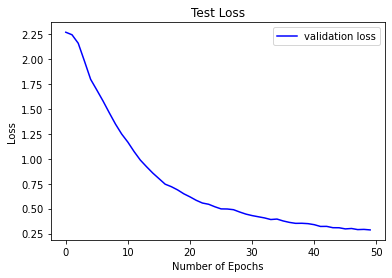

In [34]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss") # yukarıdaki kısaltmaları çizdiririz.
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [36]:
# confusion matrix
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val, axis = 1) 
# compute the confusion matrix

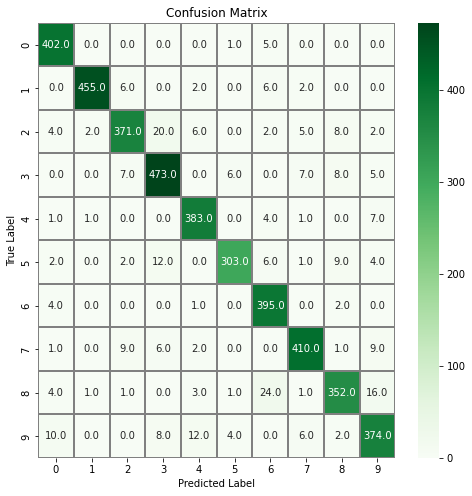

In [37]:
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt= '.1f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Yukarıdaki plota göre örnek olarak:
* **0** sayısını 5 kez **6** olarak yanlış **tahmin**de bulunmuş. (402 kere doğru tahmin)
* **2** sayısını 20 kez **3** olarak yanlış **tahmin**de bulunmuş. (371 kere doğru tahmin)
* **8** sayısını 24 kez **6** olarak yanlış **tahmin**de bulunmuş.
  
<br>

* Böyle durumda yapılacak işlemler. 
  * Epoch, batch, filter, hidden vs sizelarıyla bir geliştirme yapamıyorsak aşağıdaki gibi bir işlem yapmalıyız:
  * Örneğin **8** sayısına ait resimleri artırmalıyız(daha iyi resim ya da aynı sayıda çeşitli resim) ki **24** defa **6** tahmininde bulunamasın. Bu şekilde daha doğru tahminler yapmasını isteriz.